# Comparaison SWOT

In [1]:
## Import des librairies + chemin à l'image
import os

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant')

import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import sys
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from spectral_analysis_functions import *
# Using OceanDataLab reader 
#from sentinel2_l1c import *
import numpy as np
from S2_read import *
from s2_angs import *
from scipy.ndimage import zoom


In [2]:
# Charger les tableaux du 27/04/2023
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/Rascle_et_al/Results/')

U_BF = np.load('U_BF.npy')
V_BF = np.load('V_BF.npy')

lat_BF=np.load('lat_BF.npy')
lon_BF=np.load('lon_BF.npy')

C_BF=np.load('C_BF.npy')

#BG
U_BG = np.load('U_BG.npy')
V_BG = np.load('V_BG.npy')

lat_BG=np.load('lat_BG.npy')
lon_BG=np.load('lon_BG.npy')

C_BG=np.load('C_BG.npy')

#BH
U_BH = np.load('U_BH.npy')
V_BH = np.load('V_BH.npy')

lat_BH=np.load('lat_BH.npy')
lon_BH=np.load('lon_BH.npy')

C_BH=np.load('C_BH.npy')

# CF

U_CF = np.load('U_CF.npy')
V_CF = np.load('V_CF.npy')

lat_CF=np.load('lat_CF.npy')
lon_CF=np.load('lon_CF.npy')

C_CF=np.load('C_CF.npy')

#CG

U_CG = np.load('U_CG.npy')
V_CG = np.load('V_CG.npy')

lat_CG=np.load('lat_CG.npy')
lon_CG=np.load('lon_CG.npy')

C_CG=np.load('C_CG.npy')

#CJ

U_CJ = np.load('U_CJ.npy')
V_CJ = np.load('V_CJ.npy')

lat_CJ=np.load('lat_CJ.npy')
lon_CJ=np.load('lon_CJ.npy')

C_CJ=np.load('C_CJ.npy')
#CH

U_CH = np.load('U_CH.npy')
V_CH = np.load('V_CH.npy')

lat_CH=np.load('lat_CH.npy')
lon_CH=np.load('lon_CH.npy')

C_CH=np.load('C_CH.npy')

# DF

U_DF = np.load('U_DF.npy')
V_DF = np.load('V_DF.npy')

lat_DF=np.load('lat_DF.npy')
lon_DF=np.load('lon_DF.npy')

C_DF=np.load('C_DF.npy')

#DG

U_DG = np.load('U_DG.npy')
V_DG = np.load('V_DG.npy')

lat_DG=np.load('lat_DG.npy')
lon_DG=np.load('lon_DG.npy')

C_DG=np.load('C_DG.npy')

#DH

U_DH = np.load('U_DH.npy')
V_DH = np.load('V_DH.npy')

lat_DH=np.load('lat_DH.npy')
lon_DH=np.load('lon_DH.npy')

C_DH=np.load('C_DH.npy')

In [3]:
# Calculer les magnitudes des vecteurs de courant
C_BF = np.sqrt(U_BF**2 + V_BF**2)
C_BG = np.sqrt(U_BG**2 + V_BG**2)
C_BH = np.sqrt(U_BH**2 + V_BH**2)


C_CF = np.sqrt(U_CF**2 + V_CF**2)
C_CG = np.sqrt(U_CG**2 + V_CG**2)
C_CJ = np.sqrt(U_CJ**2 + V_CJ**2)
C_CH = np.sqrt(U_CH**2 + V_CH**2)

C_DF = np.sqrt(U_DF**2 + V_DF**2)
C_DG = np.sqrt(U_DG**2 + V_DG**2)
C_DH = np.sqrt(U_DH**2 + V_DH**2)



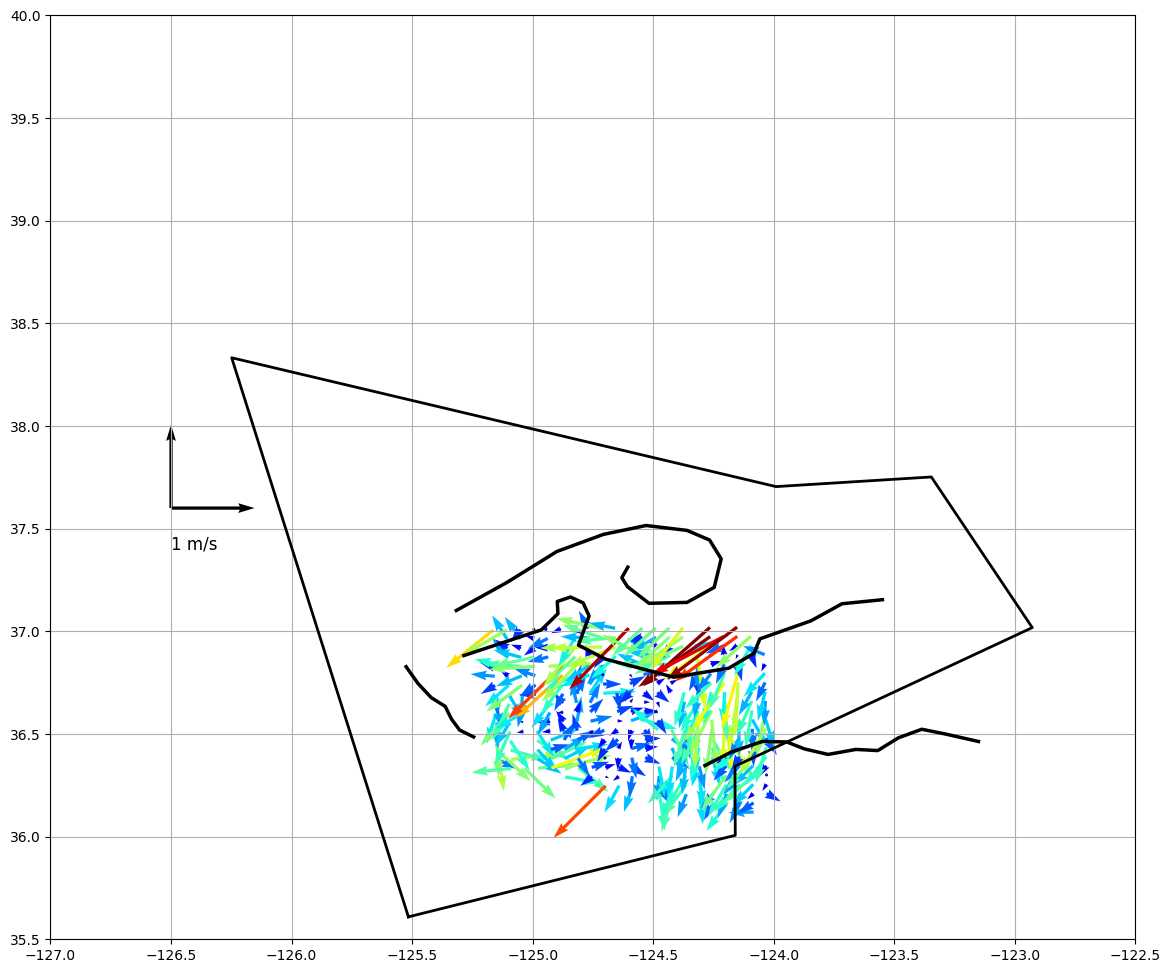

In [4]:
# Coordonnées KML et fronts
KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]

front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]

thick = 0.003
nb_pt = 1
scale_quiver = 13
width_front = 2.5

plt.figure(figsize=(14, 12))

# Tracé des lignes définies par les coordonnées KML
plt.plot(x, y, 'k', linewidth=2)


# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

# Tracer les fronts
x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k', linewidth=width_front)

x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k', linewidth=width_front)

x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k', linewidth=width_front)

x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k', linewidth=width_front)

# Fonction de filtrage par magnitude
def filter_vectors(lon, lat, U, V, C, threshold):
    magnitude = np.sqrt(U**2 + V**2)
    mask = magnitude <= threshold
    return lon[mask], lat[mask], U[mask], V[mask], C[mask]

# Définir un seuil de magnitude
magnitude_threshold = 1.1  # Ajuster ce seuil en fonction des données

# Filtrage des vecteurs
lon_BF1, lat_BF1, U_BF1, V_BF1, C_BF1 = filter_vectors(lon_BF, lat_BF, U_BF, V_BF, C_BF, magnitude_threshold)
lon_BG1, lat_BG1, U_BG1, V_BG1, C_BG1 = filter_vectors(lon_BG, lat_BG, U_BG, V_BG, C_BG, magnitude_threshold)
lon_BH1, lat_BH1, U_BH1, V_BH1, C_BH1 = filter_vectors(lon_BH, lat_BH, U_BH, V_BH, C_BH, magnitude_threshold)

lon_CF1, lat_CF1, U_CF1, V_CF1, C_CF1 = filter_vectors(lon_CF, lat_CF, U_CF, V_CF, C_CF, magnitude_threshold)
lon_CG1, lat_CG1, U_CG1, V_CG1, C_CG1 = filter_vectors(lon_CG, lat_CG, U_CG, V_CG, C_CG, magnitude_threshold)
lon_CJ1, lat_CJ1, U_CJ1, V_CJ1, C_CJ1 = filter_vectors(lon_CJ, lat_CJ, U_CJ, V_CJ, C_CJ, magnitude_threshold)
lon_CH1, lat_CH1, U_CH1, V_CH1, C_CH1 = filter_vectors(lon_CH, lat_CH, U_CH, V_CH, C_CH, magnitude_threshold)

lon_DF1, lat_DF1, U_DF1, V_DF1, C_DF1 = filter_vectors(lon_DF, lat_DF, U_DF, V_DF, C_DF, magnitude_threshold)
lon_DG1, lat_DG1, U_DG1, V_DG1, C_DG1 = filter_vectors(lon_DG, lat_DG, U_DG, V_DG, C_DG, magnitude_threshold)
# lon_DH1, lat_DH1, U_DH1, V_DH1, C_DH1 = filter_vectors(lon_DH, lat_DH, U_DH, V_DH, C_DH, magnitude_threshold)

# Tracer les vecteurs de courant avec magnitudes colorées
# q1 = plt.quiver(lon_BF1[::nb_pt], lat_BF1[::nb_pt], U_BF1[::nb_pt], V_BF1[::nb_pt], C_BF1[::nb_pt],
#                 scale=scale_quiver, width=thick, cmap='jet')

# q2 = plt.quiver(lon_BG1[::nb_pt], lat_BG1[::nb_pt], U_BG1[::nb_pt], V_BG1[::nb_pt], C_BG1[::nb_pt],
#                 scale=scale_quiver, width=thick, cmap='jet')

# q9 = plt.quiver(lon_BH1[::nb_pt], lat_BH1[::nb_pt], U_BH1[::nb_pt], V_BH1[::nb_pt], C_BH1[::nb_pt],
#                 scale=scale_quiver, width=thick, cmap='jet')

q3 = plt.quiver(lon_CF1[::nb_pt], lat_CF1[::nb_pt], U_CF1[::nb_pt], V_CF1[::nb_pt], C_CF1[::nb_pt],
                scale=scale_quiver, width=thick, cmap='jet')

# q4 = plt.quiver(lon_CG1[::nb_pt], lat_CG1[::nb_pt], U_CG1[::nb_pt], V_CG1[::nb_pt], C_CG1[::nb_pt],
#                 scale=scale_quiver, width=thick, cmap='jet')

# q5 = plt.quiver(lon_CJ1[::nb_pt], lat_CJ1[::nb_pt], U_CJ1[::nb_pt], V_CJ1[::nb_pt], C_CJ1[::nb_pt],
#                 scale=scale_quiver, width=thick, cmap='jet')

# q10 = plt.quiver(lon_CH1[::nb_pt], lat_CH1[::nb_pt], U_CH1[::nb_pt], V_CH1[::nb_pt], C_CH1[::nb_pt],
#                 scale=scale_quiver, width=thick, cmap='jet')

# q6 = plt.quiver(lon_DF1[::nb_pt], lat_DF1[::nb_pt], U_DF1[::nb_pt], V_DF1[::nb_pt], C_DF1[::nb_pt],
#                 scale=scale_quiver, width=thick, cmap='jet')

# q7 = plt.quiver(lon_DG1[::nb_pt], lat_DG1[::nb_pt], U_DG1[::nb_pt], V_DG1[::nb_pt], C_DG1[::nb_pt],
#                 scale=scale_quiver, width=thick, cmap='jet')

# q8 = plt.quiver(lon_DH1[::nb_pt], lat_DH1[::nb_pt], U_DH1[::nb_pt], V_DH1[::nb_pt], C_DH1[::nb_pt],
#                 scale=scale_quiver, width=thick, cmap='jet')

# # Ajouter une colorbar
# cbar = plt.colorbar(q4, orientation='vertical', pad=0.05)
# cbar.set_label('Magnitude du courant (m/s)')

# Afficher la flèche horizontale de référence
plt.quiver(-126.5, 37.6, 1, 0, scale=scale_quiver, color='black', width=thick, label='Horizontal')

# Afficher la flèche verticale de référence
plt.quiver(-126.5, 37.6, 0, 1, scale=scale_quiver, color='black', width=thick, label='Vertical')

plt.text(-126.5, 37.4, '1 m/s', fontsize=12, color='black')

plt.xlim(-127, -122.5)
plt.ylim(35.5, 40)

plt.grid(True)
plt.show()


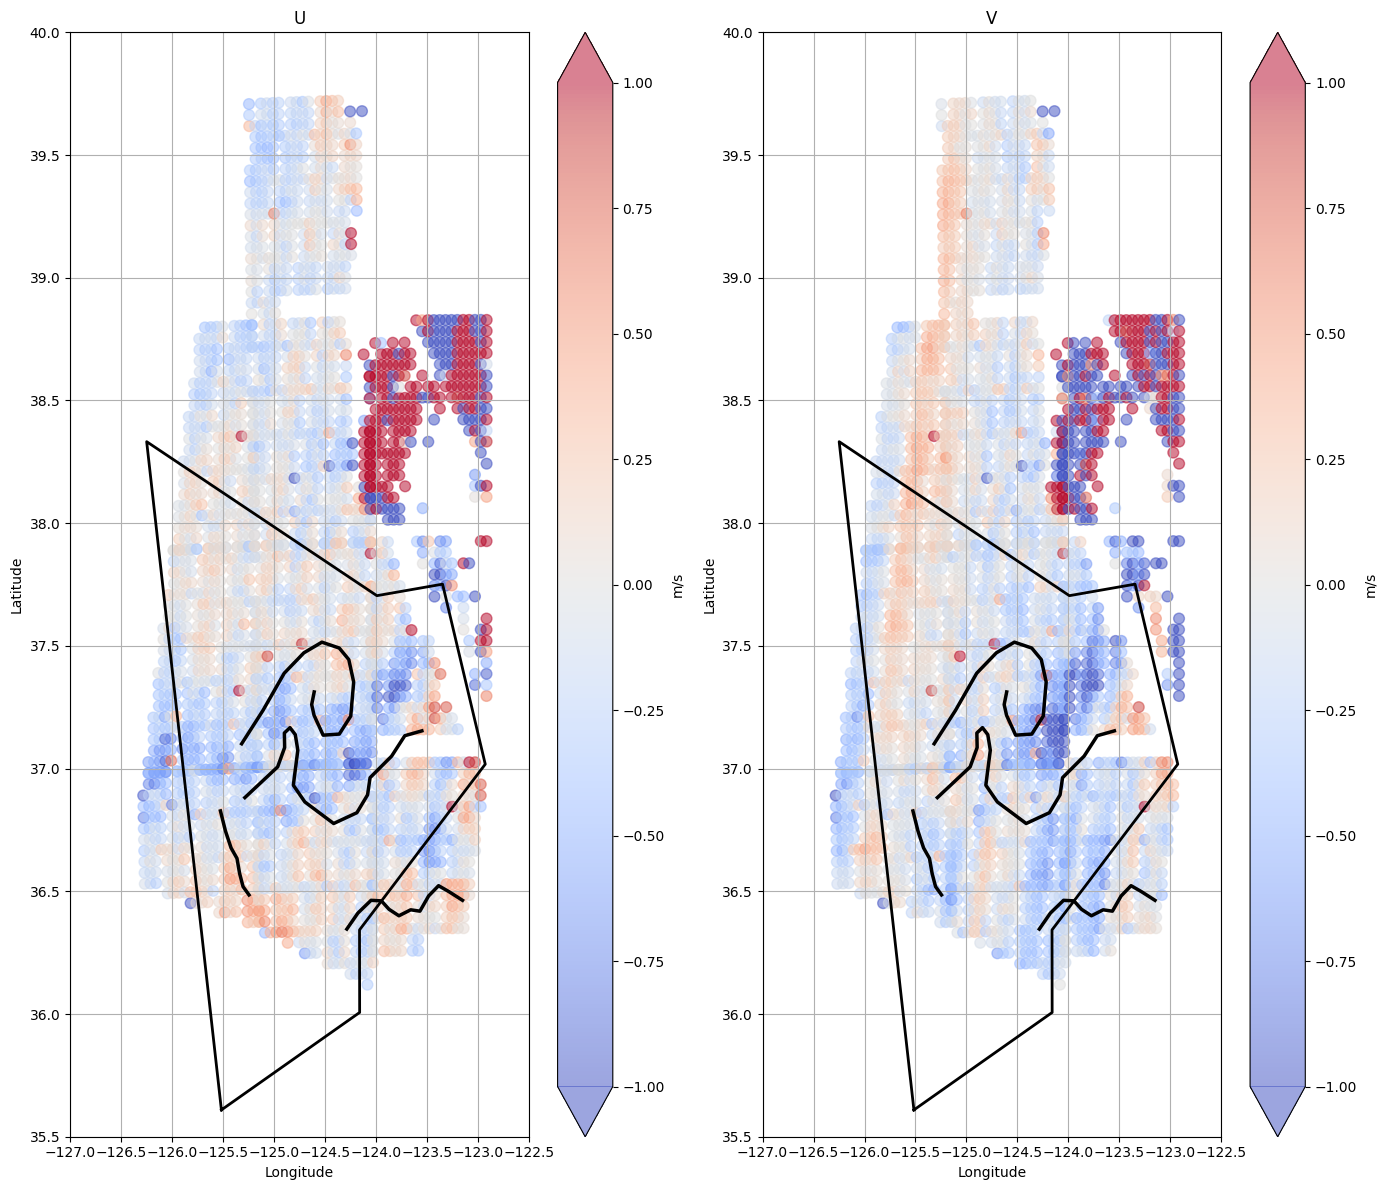

In [5]:
# Représentation en pcolor scatter plot etc etc

# Calculer les magnitudes des vecteurs de courant
# Calculer les magnitudes des vecteurs de courant
C_BF = np.sqrt(U_BF**2 + V_BF**2)
C_BG = np.sqrt(U_BG**2 + V_BG**2)
C_BH = np.sqrt(U_BH**2 + V_BH**2)


C_CF = np.sqrt(U_CF**2 + V_CF**2)
C_CG = np.sqrt(U_CG**2 + V_CG**2)
C_CJ = np.sqrt(U_CJ**2 + V_CJ**2)
C_CH = np.sqrt(U_CH**2 + V_CH**2)


C_DF = np.sqrt(U_DF**2 + V_DF**2)
C_DG = np.sqrt(U_DG**2 + V_DG**2)
C_DH = np.sqrt(U_DH**2 + V_DH**2)


# Coordonnées KML et fronts
KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]

front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]

thick = 0.003
nb_pt = 1
scale_quiver = 13
width_front = 2.5

fig, axs = plt.subplots(1, 2, figsize=(14, 12))

axs[0].plot(x, y, 'k', linewidth=2)
axs[1].plot(x, y, 'k', linewidth=2)

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

x1, y1 = extract_coords(front1)
axs[0].plot(x1, y1, 'k', linewidth=width_front)
axs[1].plot(x1, y1, 'k', linewidth=width_front)

x2, y2 = extract_coords(front2)
axs[0].plot(x2, y2, 'k', linewidth=width_front)
axs[1].plot(x2, y2, 'k', linewidth=width_front)

x3, y3 = extract_coords(front3)
axs[0].plot(x3, y3, 'k', linewidth=width_front)
axs[1].plot(x3, y3, 'k', linewidth=width_front)

x4, y4 = extract_coords(front4)
axs[0].plot(x4, y4, 'k', linewidth=width_front)
axs[1].plot(x4, y4, 'k', linewidth=width_front)

# Premier sous-plot (axs[0]) - Scatter Plot avec U
sc1 = axs[0].scatter(lon_BF, lat_BF, c=U_BF, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc8 = axs[0].scatter(lon_BG, lat_BG, c=U_BG, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc9 = axs[0].scatter(lon_BH, lat_BH, c=U_BH, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)

sc2 = axs[0].scatter(lon_CF, lat_CF, c=U_CF, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc3 = axs[0].scatter(lon_CG, lat_CG, c=U_CG, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc4 = axs[0].scatter(lon_CJ, lat_CJ, c=U_CJ, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc4 = axs[0].scatter(lon_CH, lat_CH, c=U_CH, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)

sc5 = axs[0].scatter(lon_DF, lat_DF, c=U_DF, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc6 = axs[0].scatter(lon_DG, lat_DG, c=U_DG, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc7 = axs[0].scatter(lon_DH, lat_DH, c=U_DH, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)

axs[0].set_title('U')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].set_xlim(-127, -122.5)
axs[0].set_ylim(35.5, 40)
axs[0].grid(True)
# Ajouter la color bar pour U
cbar1 = fig.colorbar(sc1, ax=axs[0], extend='both')
cbar1.set_label('m/s')

# Deuxième sous-plot (axs[1]) - Scatter Plot avec V
sc12 = axs[1].scatter(lon_BF, lat_BF, c=V_BF, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc82 = axs[1].scatter(lon_BG, lat_BG, c=V_BG, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc92 = axs[1].scatter(lon_BH, lat_BH, c=V_BH, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)


sc22 = axs[1].scatter(lon_CF, lat_CF, c=V_CF, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc32 = axs[1].scatter(lon_CG, lat_CG, c=V_CG, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc42 = axs[1].scatter(lon_CJ, lat_CJ, c=V_CJ, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc102 = axs[1].scatter(lon_CH, lat_CH, c=V_CH, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)


sc52 = axs[1].scatter(lon_DF, lat_DF, c=V_DF, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc62 = axs[1].scatter(lon_DG, lat_DG, c=V_DG, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)
sc72 = axs[1].scatter(lon_DH, lat_DH, c=V_DH, s=60, alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1)


axs[1].set_title('V')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].set_xlim(-127, -122.5)
axs[1].set_ylim(35.5, 40)
axs[1].grid(True)
# Ajouter la color bar pour V
cbar2 = fig.colorbar(sc12, ax=axs[1], extend='both')
cbar2.set_label('m/s')

# Ajustement de l'espacement entre les sous-plots
plt.tight_layout()

# Afficher la figure
plt.show()

In [6]:
def replace_zeros_with_nan(lon, lat, U,V):
#     """
#     Remplace les valeurs de longitude et latitude égales à 0 par NaN et 
#     les valeurs correspondantes dans U par NaN.
    
#     Parameters:
#     lon (numpy.ndarray): Matrice des longitudes.
#     lat (numpy.ndarray): Matrice des latitudes.
#     U (numpy.ndarray): Matrice de l'intensité du courant.
    
#     Returns:
#     tuple: Matrices modifiées de longitude, latitude et intensité du courant.
#     """
    mask = (lon == 0) | (lat == 0)
    lon_cleaned = np.where(mask, np.nan, lon)
    lat_cleaned = np.where(mask, np.nan, lat)
    U_cleaned = np.where(mask, np.nan, U)
    V_cleaned = np.where(mask, np.nan, V)

    return lon_cleaned, lat_cleaned, U_cleaned, V_cleaned

lon_BF0, lat_BF0, U_BF0,V_BF0 = replace_zeros_with_nan(lon_BF, lat_BF, U_BF,V_BF)
lon_BG0, lat_BG0, U_BG0,V_BG0 = replace_zeros_with_nan(lon_BG, lat_BG, U_BG,V_BG)
lon_BH0, lat_BH0, U_BH0,V_BH0 = replace_zeros_with_nan(lon_BH, lat_BH, U_BH,V_BH)


lon_CF0, lat_CF0, U_CF0,V_CF0 = replace_zeros_with_nan(lon_CF, lat_CF, U_CF,V_CF)
lon_CG0, lat_CG0, U_CG0,V_CG0 = replace_zeros_with_nan(lon_CG, lat_CG, U_CG,V_CG)
lon_CJ0, lat_CJ0, U_CJ0,V_CJ0 = replace_zeros_with_nan(lon_CJ, lat_CJ, U_CJ,V_CJ)
lon_CH0, lat_CH0, U_CH0,V_CH0 = replace_zeros_with_nan(lon_CH, lat_CH, U_CH,V_CH)

lon_DF0, lat_DF0, U_DF0,V_DF0 = replace_zeros_with_nan(lon_DF, lat_DF, U_DF,V_DF)
lon_DG0, lat_DG0, U_DG0,V_DG0 = replace_zeros_with_nan(lon_DG, lat_DG, U_DG,V_DG)
lon_DH0, lat_DH0, U_DH0,V_DH0 = replace_zeros_with_nan(lon_DH, lat_DH, U_DH,V_DH)


# print('U',np.shape(U_BF))
print('U0',np.shape(U_BF0))
print('lon_BF0',np.shape(lon_BF0))
print('lat_BF0',np.shape(lat_BF0))

# print('U1',U_BF0)
# print('lon1',lon_BF0)
# print('lat1',lat_BF0)

# os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/') 

# np.save('U1',U_BF0)
# np.save('lon1',lon_BF0)
# np.save('lat1',lat_BF0)

U0 (22, 22)
lon_BF0 (22, 22)
lat_BF0 (22, 22)


/tmp/ipykernel_1151582/1259675776.py:68: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  c4 = ax.pcolor(lon_CJ0, lat_CJ0, U_CJ0, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)
/tmp/ipykernel_1151582/1259675776.py:71: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  c5 = ax.pcolor(lon_DF0, lat_DF0, U_DF0, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)
/tmp/ipykernel_1151582/1259675776.py:72: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please suppl

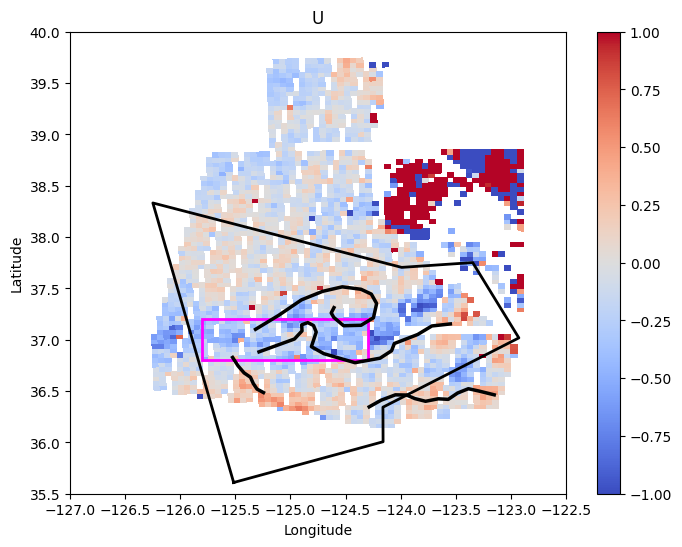

In [7]:

# Coordonnées KML et fronts
KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]

front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]

import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot principal (ax[0])
ax.plot(x, y, 'k', linewidth=2)

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

x1, y1 = extract_coords(front1)
ax.plot(x1, y1, 'k', linewidth=width_front)

x2, y2 = extract_coords(front2)
ax.plot(x2, y2, 'k', linewidth=width_front)

x3, y3 = extract_coords(front3)
ax.plot(x3, y3, 'k', linewidth=width_front)

x4, y4 = extract_coords(front4)
ax.plot(x4, y4, 'k', linewidth=width_front)

c1 = ax.pcolor(lon_BF0, lat_BF0, U_BF0, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)
c8 = ax.pcolor(lon_BG0, lat_BG0, U_BG0, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)
c9 = ax.pcolor(lon_BH0, lat_BH0, U_BH0, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)

c2 = ax.pcolor(lon_CF0, lat_CF0, U_CF0, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)
c3 = ax.pcolor(lon_CG0, lat_CG0, U_CG0, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)
c4 = ax.pcolor(lon_CJ0, lat_CJ0, U_CJ0, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)
c10 = ax.pcolor(lon_CH0, lat_CH0, U_CH0, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)

c5 = ax.pcolor(lon_DF0, lat_DF0, U_DF0, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)
c6 = ax.pcolor(lon_DG0, lat_DG0, U_DG0, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)
c7 = ax.pcolor(lon_DH0, lat_DH0, U_DH0, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)

# Ajouter un patch rectangle orange
rect = patches.Rectangle(
    (-125.8, 36.8),  # Coordonnées du coin inférieur gauche (longitude, latitude)
    1.5,         # Largeur du rectangle (en degrés de longitude)
    0.4,         # Hauteur du rectangle (en degrés de latitude)
    linewidth=2,  # Épaisseur de la bordure
    edgecolor='magenta',  # Couleur de la bordure
    facecolor='none'     # Pas de remplissage, seulement le contour
)
ax.add_patch(rect)

# Ajouter une barre de couleur et personnaliser l'axe
fig.colorbar(c1, ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('U')
ax.set_xlim(-127, -122.5)
ax.set_ylim(35.5,40)
# ax.set_xlim(min_lon_swat ,max_lon_swat)
# ax.set_ylim(min_lat_swat,max_lat_swat)
plt.show()



## Comparaison SWOT

In [8]:
US2=np.concatenate([U_BF,U_BG,U_BH,U_CF,U_CF,U_CG,U_CH,U_CJ,U_DF,U_DG,U_DH])
VS2=np.concatenate([V_BF,V_BG,V_BH,V_CF,V_CF,V_CG,V_CH,V_CJ,V_DF,V_DG,V_DH])
latS2=np.concatenate([lat_BF,lat_BG,lat_BH,lat_CF,lat_CF,lat_CG,lat_CH,lat_CJ,lat_DF,lat_DG,lat_DH])
lonS2=np.concatenate([lon_BF,lon_BG,lon_BH,lon_CF,lon_CF,lon_CG,lon_CH,lon_CJ,lon_DF,lon_DG,lon_DH])

# US2=np.concatenate([U_BF,U_BG,U_BH,U_CF,U_CF,U_CG,U_CH,U_CJ,U_DF,U_DG])
# VS2=np.concatenate([V_BF,V_BG,V_BH,V_CF,V_CF,V_CG,V_CH,V_CJ,V_DF,V_DG])
# latS2=np.concatenate([lat_BF,lat_BG,lat_BH,lat_CF,lat_CF,lat_CG,lat_CH,lat_CJ,lat_DF,lat_DG])
# lonS2=np.concatenate([lon_BF,lon_BG,lon_BH,lon_CF,lon_CF,lon_CG,lon_CH,lon_CJ,lon_DF,lon_DG])

print(np.shape(US2))
print(np.shape(VS2))
print(np.shape(latS2))
print(np.shape(lonS2))


(242, 22)
(242, 22)
(242, 22)
(242, 22)


In [9]:
import os

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/swellSWOT/') 
import pylab as plt
import numpy as np
import swot_ssh_utils as swot
import swot_swell_utils as swell
from cartopy import crs as ccrs
import cartopy.feature as cfeature  # Importer cartopy.feature
from netCDF4 import Dataset
import xarray as xr
import sys as sys
import glob as glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import datetime
from scipy import ndimage
from scipy.interpolate import RegularGridInterpolator
from wave_physics_functions import wavespec_Efth_to_Ekxky,wavespec_Efth_to_first3
import matplotlib.patches as patches

from matplotlib.pyplot import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pickle
from  lib_filters_obp import *
from scipy import signal
from numpy.ma import masked_array
import cmocean
import cmocean.cm as cmo

from  spectral_analysis_functions import *
plt.rcParams.update({'font.size': 18,'savefig.facecolor':'white'})

cNorm = mcolors.Normalize(vmin=0, vmax=2)
jet = plt.get_cmap('jet')
mpl.rcParams.update({'figure.figsize':[10,6],'axes.grid' : True,'font.size': 14,'savefig.facecolor':'white'})

In [10]:
# This opens the track output WAVEWATCH III spectra file. Alternatively for just the H_18, we could use the _ef.nc output (smaller file)

modelOK=0 # set this to 0 if you do not want to use model output ... 

if (modelOK > 0):
    # at ifremer, hese files are here: /home/datawork-WW3/PROJECT/SWOT/GLOBAL/work2023-01-01T00_2023-07-01T00
#     filetr='/media/ardhuin/FabLinux/WW3-SWOT/GLOBAL/SWOT_WW3-GLOB-30M_202310_trck.nc'
    filter='/home/acuevas/Bureau/S2_ALEXANDRA/L3-SWOT/SWOT_L3_LR_SSH_Unsmoothed_503_026_20230427T034332_20230427T043438_v1.0.nc'
    ds_ww3t = xr.open_dataset(filetr)
    modang=np.mod(90-ds_ww3t.direction,360)
    moddf=ds_ww3t.frequency2.values-ds_ww3t.frequency1.values
    modf=ds_ww3t.frequency.values
    modnth=np.shape(modang)[0]
    moddth=(2*np.pi/modnth)

Reading file: /home/acuevas/Bureau/S2_ALEXANDRA/L3-SWOT/SWOT_L3_LR_SSH_Unsmoothed_503_013_20230427T034332_20230427T043438_v1.0.nc
group: left , lonlat: 37.0N , lat_bounds: [36.5, 37.96]
number of lines (alongtrack): 697 , number of pixels (crosstrack): 519


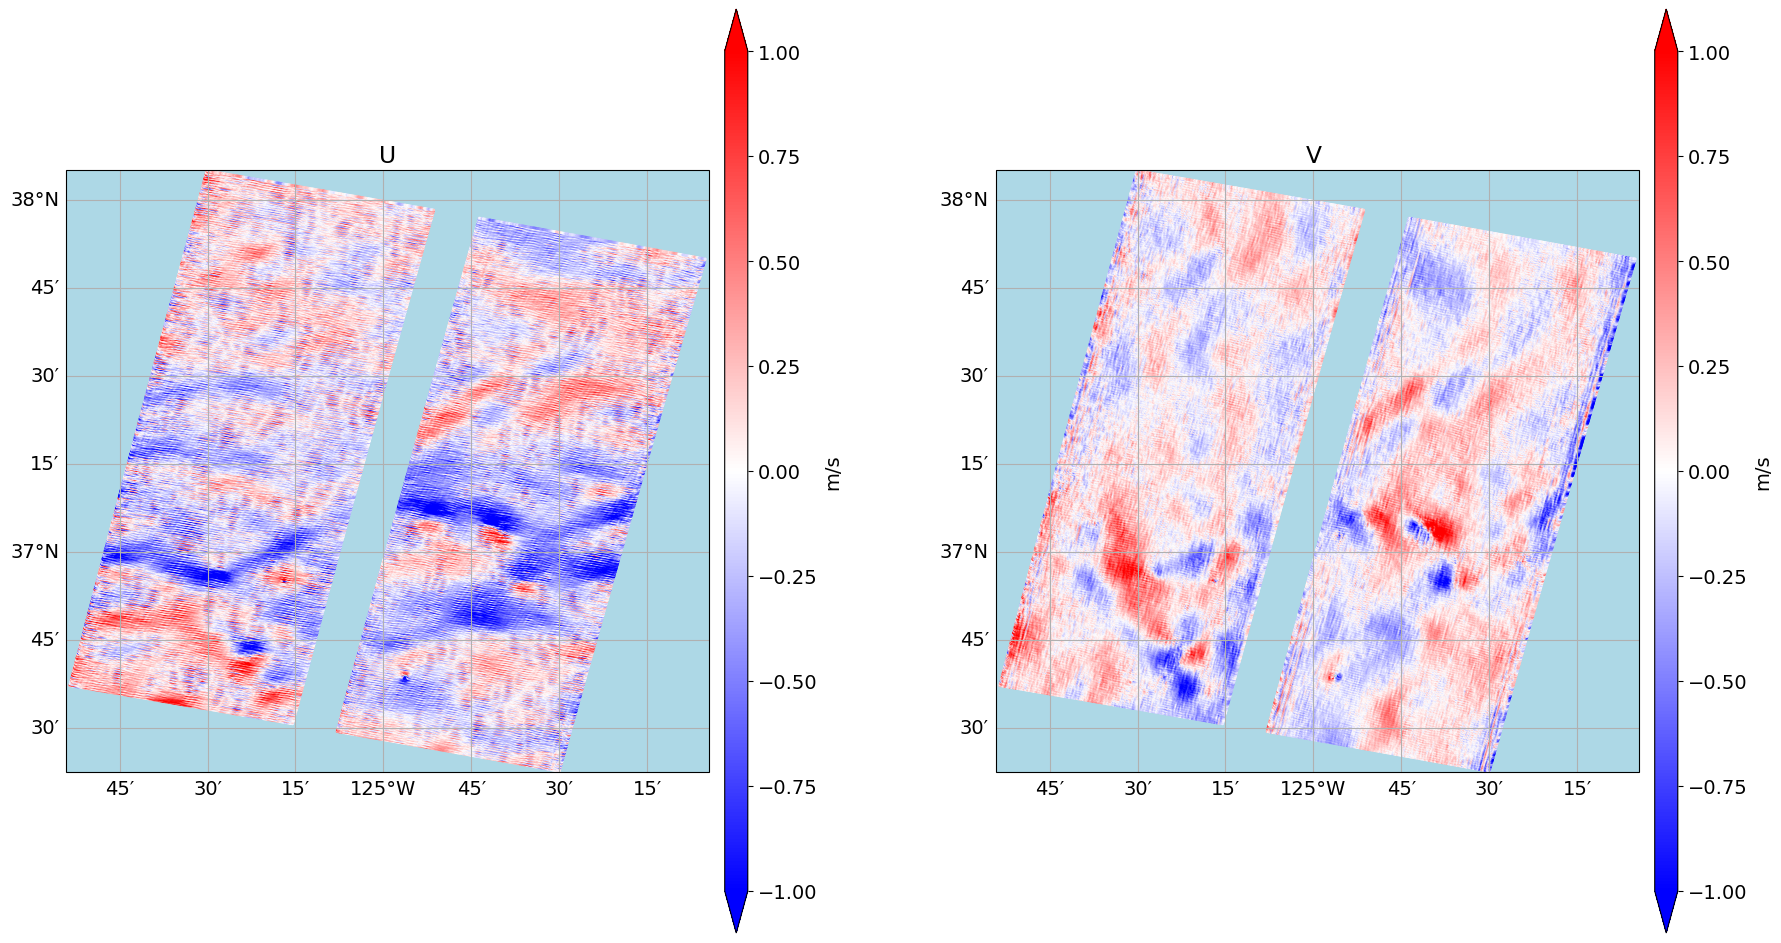

In [11]:
hemiNS=['A','N','S']
hemiWE=['A','E','W']

dBE=0

lightcmap = cmocean.tools.lighten(cmo.ice, 1)
lightcmap2 = cmocean.tools.lighten(cmo.ice_r, 1)
    
# pth_swot='/media/ardhuin/FabLinux/SWOT1/'  # this is for the beta data
# pth_swot='/media/ardhuin/FabLinux/SWOT2/'  # this is for the updated data
pth_swot='/home/acuevas/Bureau/S2_ALEXANDRA/L3-SWOT/'
pth_results=''


cohthr=0.3; flagssha=1E10;
fs1=20; # font size
fshrink=0.8;

nm=0;mm=0;
calibration=1.

# To select a sample of data, just uncomment one of the lines with "days= ... "
# Samples in Fig. 1 of Ardhuin et al. (GRL 2024) 
cycle='503'; days='20230427';tracks='013';latc=37; side='left';n=8;m=8;dBE=20;dBE2=0;amax=0.1;mask_choice=0   # sample A



# threshold for coherence
cfac=np.sqrt(n*m)

# loop over a single point  (this is done to keep the structure of the other notebook)
for latc in [latc]:
    file_list = glob.glob(pth_swot+'SWOT_L3_LR_SSH_Unsmoothed_'+cycle+'_'+tracks+'*.nc')
    #file_list = glob.glob(pth_swot+'SWOT_L2_LR_SSH_*_'+tracks+'_'+days+'*.nc')
    file_swot=file_list[0]
    print('Reading file:',file_swot)
    ddla = xr.open_dataset(file_swot)
    
#     lat_bounds=[-0.5+float(latc), 0.5+float(latc)];
    lat_bounds=[-0.5+float(latc), 0.96+float(latc)];
    
    #lonlat=f'{abs(latc):02d}'+hemiNS[int(np.sign(latc))]
    lonlat=f'{abs(latc):04.1f}'+hemiNS[int(np.sign(latc))]
    print('group:',side,', lonlat:',lonlat,', lat_bounds:',lat_bounds)

    ddl,indsub0,indsub1=swot.subset(ddla,lat_bounds)

# Preprocess data
#     ssha = ddl.ssh_karin_2
#     flag = ddl.ssh_karin_2_qual
#     ssha = np.where(flag < flagssha, ssha, np.nan)
#     sig0 = ddl.sig0_karin_2
#     flas = ddl.sig0_karin_2_qual
    #sig0 = np.where(flas == 0, sig0, np.nan)
    U=ddl.ugos.values
    V=ddl.vgos.values
    lon = ddl.longitude.values
    lat = ddl.latitude.values
    [nline,npix]=np.shape(U)
    print('number of lines (alongtrack):',nline,', number of pixels (crosstrack):',npix)
#     dlon=lon[npix-10,10]-lon[10,10]
#     dlat=lat[npix-10,10]-lat[10,10]
#     midlat=0.5*(lat[npix-10,10]+lat[10,10])
#     trackangle=-90-np.arctan2(dlat,dlon*np.cos(midlat*np.pi/180))*180/np.pi
    
    # Plots the long (1° latitude ) segment 
    # Create plots
    figs=2
    if figs > 1:
      fig, ax = plt.subplots(
        figsize=(22, 24),
        ncols=2,
        nrows=1,
        sharex=True,
        sharey=True,
        subplot_kw=dict(projection=ccrs.PlateCarree())
      )
    
      # Plot original data (SSH and sigma0) with a map projection, to make sure that we know were we are. 
      swot.plot_a_segment(ax[0], lon, lat, U, title='U',
                         vmin=-1,vmax=+1,cblab='m/s')
    
      # Plot sig0
#       sig0max=np.nanmax(sig0)
      swot.plot_a_segment(ax[1], lon, lat, V, title='V ',vmin=-1,vmax=1,cblab='m/s')  
        



U (95, 102)
V (95, 102)
lon (102,)
lat (95,)


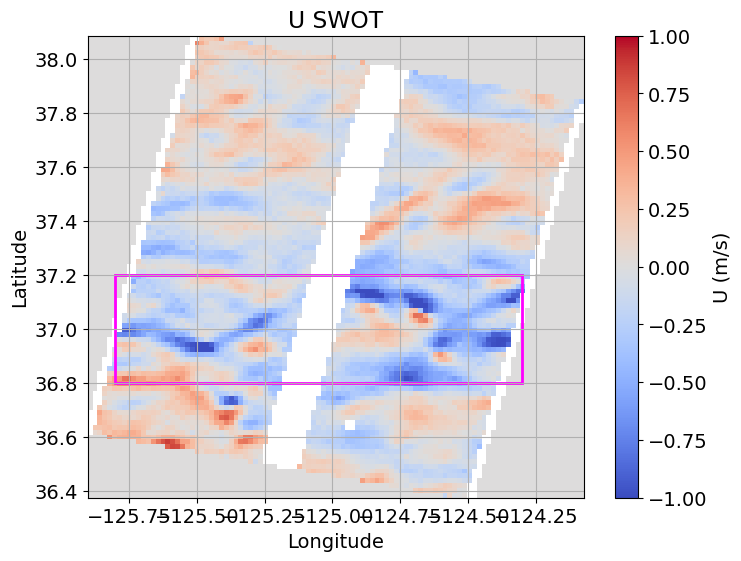

In [12]:
# Smoothed un peu le courant car 250m de résolution sur SWOT et on regarde des boites de 3km
#Spatial averaging

# Taille de la grille à laquelle vous voulez réduire la résolution (3km environ)
grid_resolution =2  # en km

# Convertir la résolution en mètres
grid_resolution_meters = grid_resolution * 1000  # en mètres

# Calculer les limites pour les nouveaux bins
lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()

# Nombre de points dans chaque direction pour la nouvelle grille
num_points_x = int(np.ceil((lon_max - lon_min) * 111 / grid_resolution))
num_points_y = int(np.ceil((lat_max - lat_min) * 111 / grid_resolution))

# Calculer les nouveaux bins pour le moyennage
lon_bins = np.linspace(lon_min, lon_max, num_points_x + 1)
lat_bins = np.linspace(lat_min, lat_max, num_points_y + 1)

# Initialiser des tableaux pour les moyennes U et V
U_smoothed = np.zeros((num_points_y, num_points_x))
V_smoothed = np.zeros((num_points_y, num_points_x))
count = np.zeros((num_points_y, num_points_x), dtype=int)  # Compteur de points dans chaque bin

# Calculer les moyennes U et V pour chaque bin
for i in range(num_points_x):
    for j in range(num_points_y):
        # Sélectionner les indices des données à l'intérieur du bin actuel
        mask = (lon >= lon_bins[i]) & (lon < lon_bins[i + 1]) & \
               (lat >= lat_bins[j]) & (lat < lat_bins[j + 1])

        # Si des points sont présents dans le bin, calculer la moyenne
        if np.any(mask):
            U_smoothed[j, i] = np.mean(U[mask])
            V_smoothed[j, i] = np.mean(V[mask])
            count[j, i] = np.sum(mask)

# Calculer les nouvelles coordonnées des centres des cellules
lon_smoothed = (lon_bins[:-1] + lon_bins[1:]) / 2
lat_smoothed = (lat_bins[:-1] + lat_bins[1:]) / 2

print('U',np.shape(U_smoothed))
print('V',np.shape(U_smoothed))
print('lon',np.shape(lon_smoothed))
print('lat',np.shape(lat_smoothed))


# Création des données fictives pour exemple (lon_smoothed, lat_smoothed, U_smoothed doivent exister dans votre code)
lon_mesh, lat_mesh = np.meshgrid(lon_smoothed, lat_smoothed)

# Création de la figure et du seul axe (ax[0] n'est plus nécessaire dans ce cas)
fig1, ax = plt.subplots(figsize=(8, 6))

# Plot des données U_smoothed avec pcolormesh
pcm = ax.pcolormesh(lon_mesh - 360, lat_mesh, U_smoothed, shading='auto',
                    vmin=-1, vmax=+1, cmap='coolwarm')

# Ajouter une barre de couleur
fig1.colorbar(pcm, ax=ax, label='U (m/s)')
# Ajouter un patch rectangle orange
rect = patches.Rectangle(
    (-125.8, 36.8),  # Coordonnées du coin inférieur gauche (longitude, latitude)
    1.5,         # Largeur du rectangle (en degrés de longitude)
    0.4,         # Hauteur du rectangle (en degrés de latitude)
    linewidth=2,  # Épaisseur de la bordure
    edgecolor='magenta',  # Couleur de la bordure
    facecolor='none'     # Pas de remplissage, seulement le contour
)
ax.add_patch(rect)

# Ajouter un titre
ax.set_title('U SWOT')

# Ajouter des étiquettes d'axe
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Afficher la figure
plt.show()



# Ajout au 12/10/2024

In [13]:
print('lon',np.shape(lon_smoothed))
print('lat',np.shape(lat_smoothed))
print('U',np.shape(U_smoothed))

print('max lat swot',max(lat_smoothed))
print('max lon swot',max(lon_smoothed)-360)
print('min lat swot',min(lat_smoothed))
print('min lon swot',min(lon_smoothed)-360)


print('US2',np.shape(US2))

print('latS2',np.shape(latS2))
print('lonS2',np.shape(lonS2))

print('max lat s2',np.max(latS2[latS2 != 0]))
print('max lon s2',np.max(lonS2[lonS2 != 0]))
print('min lat s2',np.min(latS2[latS2 != 0]))
print('min lon s2',np.min(lonS2[lonS2 != 0]))


lon (102,)
lat (95,)
U (95, 102)
max lat swot 38.07562800000001
max lon swot -124.08333049019606
min lat swot 36.383252
min lon swot -125.8933495098039
US2 (242, 22)
latS2 (242, 22)
lonS2 (242, 22)
max lat s2 39.724527178361605
max lon s2 -122.91405601555442
min lat s2 36.080287119527505
min lon s2 -126.36731206788508


In [14]:
max_lat_swat = max(lat_smoothed)
min_lat_swat = min(lat_smoothed)
max_lon_swat = max(lon_smoothed)-360
min_lon_swat = min(lon_smoothed)-360

# filtre de S2

lonS2_flat = lonS2.flatten()
latS2_flat = latS2.flatten()
US2_flat = US2.flatten()
VS2_flat=VS2.flatten()
# Créer un masque pour sélectionner les valeurs qui se situent dans les limites géographiques
mask = (lonS2_flat >= min_lon_swat) & (lonS2_flat <= max_lon_swat) & \
       (latS2_flat >= min_lat_swat) & (latS2_flat <= max_lat_swat)

# Extraire les valeurs correspondantes
lonS2_filtered = lonS2_flat[mask]
latS2_filtered = latS2_flat[mask]
US2_filtered = US2_flat[mask]
VS2_filtered = VS2_flat[mask]

print('lonS2 filetred',np.shape(lonS2_filtered))
print('latS2 filetred',np.shape(latS2_filtered))
print('US2 filtered',np.shape(US2_filtered))

lonS2 filetred (1605,)
latS2 filetred (1605,)
US2 filtered (1605,)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
# from sklearn.metrics import r2_score
from scipy.stats import pearsonr

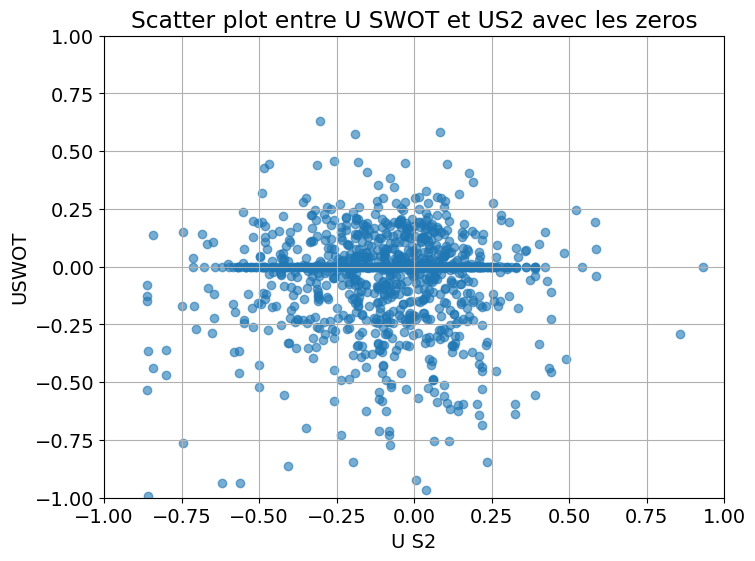

In [16]:
lon_corrected=lon_smoothed-360
# Créer une grille à partir des valeurs de lon et lat
lon_grid, lat_grid = np.meshgrid(lon_corrected, lat_smoothed)

# Aplatir les tableaux pour faciliter l'interpolation
points = np.array([lon_grid.flatten(), lat_grid.flatten()]).T
values = U_smoothed.flatten()
values2 = V_smoothed.flatten()

# print(values)

# Nettoyage des valeurs de longitudes et latitudes S2
mask_valid = (lonS2_filtered != 0) & (latS2_filtered != 0)  # Masque pour exclure les 0
lonS2_clean = lonS2_filtered[mask_valid]  # Supprimer les zéros de lonS2
latS2_clean = latS2_filtered[mask_valid]  # Supprimer les zéros de latS2

# Interpolation des valeurs de U sur la grille nettoyée de US2
U_interp = griddata(points, values, (lonS2_clean, latS2_clean), method='linear')
V_interp = griddata(points, values2, (lonS2_clean, latS2_clean), method='linear')

# Vérification si l'interpolation a produit des NaN, création du masque
mask = ~np.isnan(U_interp)

# Applatissement de US2 pour correspondre à la taille des données interpolées
US2_flat = US2_filtered.flatten()

# Vérification que les dimensions correspondent après interpolation et aplatissement
min_size = min(mask.sum(), US2_flat.size)

# Sélection des valeurs correspondantes pour l'affichage du scatter plot
U_interp_clean = U_interp[mask][:min_size]
US2_clean = US2_flat[:min_size]

# Création du diagramme de dispersion entre U interpolé et US2
plt.figure(figsize=(8, 6))
# plt.scatter(U_interp_clean, US2_clean, alpha=0.6)

plt.scatter(US2_clean,U_interp_clean, alpha=0.6)
plt.title("Scatter plot entre U SWOT et US2 avec les zeros")
plt.xlabel('U S2')
plt.ylabel('USWOT')
plt.xlim(-1, 1)  # Limites de l'axe x
plt.ylim(-1, 1)  # Limites de l'axe y
plt.grid(True)
plt.show()



Le coefficient de corrélation r entre les données et la droite y=x est : 0.3864
La RMSE est : 0.2703


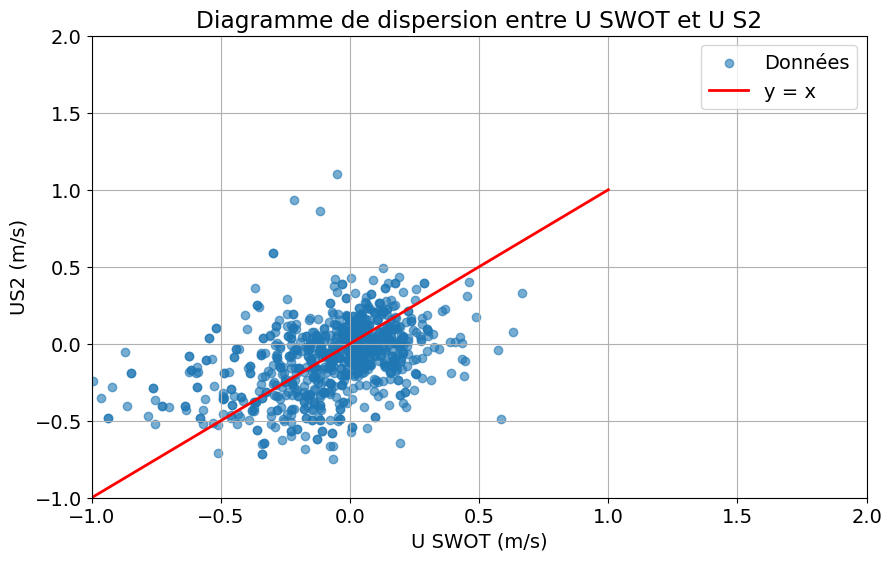

In [17]:
# Retirer les zéros si souhaité
non_zero_mask = (U_interp != 0) & (US2_filtered != 0)
U_non_zero = U_interp[non_zero_mask]
US2_non_zero = US2_filtered[non_zero_mask]
# Filtrer les NaN des valeurs non nulles
final_mask = ~np.isnan(U_non_zero) & ~np.isnan(US2_non_zero)
U_final = U_non_zero[final_mask]
US2_final = US2_non_zero[final_mask]

correlation_coefficient, _ = pearsonr(US2_final, U_final)
print(f"Le coefficient de corrélation r entre les données et la droite y=x est : {correlation_coefficient:.4f}")

#Calcul de la RMSE
rmse = np.sqrt(np.mean((US2_final - U_final) ** 2))

print(f"La RMSE est : {rmse:.4f}")

# Créer le diagramme de dispersion sans les NaN et les zéros
plt.figure(figsize=(10, 6))
plt.scatter(U_non_zero, US2_non_zero, alpha=0.6, label='Données')
plt.title("Diagramme de dispersion entre U SWOT et U S2")
plt.xlabel('U SWOT (m/s)')
plt.ylabel('US2 (m/s)')
plt.xlim(-1, 2)  # Limites de l'axe x
plt.ylim(-1, 2)  # Limites de l'axe y
plt.grid(True)

# Ajouter la droite y = x
x = np.linspace(-1, 1, 100)
plt.plot(x, x, color='red', lw=2, label='y = x')  # Droite rouge

plt.legend()
plt.show()

# Ajout au 06/02/2025

In [18]:
max_lat_swat = max(lat_smoothed)
min_lat_swat = min(lat_smoothed)
max_lon_swat = max(lon_smoothed)-360
min_lon_swat = min(lon_smoothed)-360

# filtre de S2

lonS2_flat = lonS2.flatten()
latS2_flat = latS2.flatten()
US2_flat = US2.flatten()
VS2_flat=VS2.flatten()
# Créer un masque pour sélectionner les valeurs qui se situent dans les limites géographiques
mask = (lonS2_flat >= min_lon_swat) & (lonS2_flat <= max_lon_swat) & \
       (latS2_flat >= min_lat_swat) & (latS2_flat <= max_lat_swat)

# Extraire les valeurs correspondantes
lonS2_filtered = lonS2_flat[mask]
latS2_filtered = latS2_flat[mask]
US2_filtered = US2_flat[mask]
VS2_filtered = VS2_flat[mask]